## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete= pd.merge(mouse_metadata, study_results, on=["Mouse ID", "Mouse ID"])
mouse_data_complete.head()
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice= len(mouse_data_complete["Mouse ID"].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice= mouse_data_complete.loc[mouse_data_complete.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicated_mice


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_info= mouse_data_complete.loc[mouse_data_complete["Mouse ID"]== "g989", :]
duplicated_mouse_info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_data_complete.drop_duplicates(subset=['Mouse ID', "Timepoint"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice=len(clean_df["Mouse ID"].unique())
clean_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
mice_and_drugs= clean_df["Drug Regimen"].value_counts()
mice_and_drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


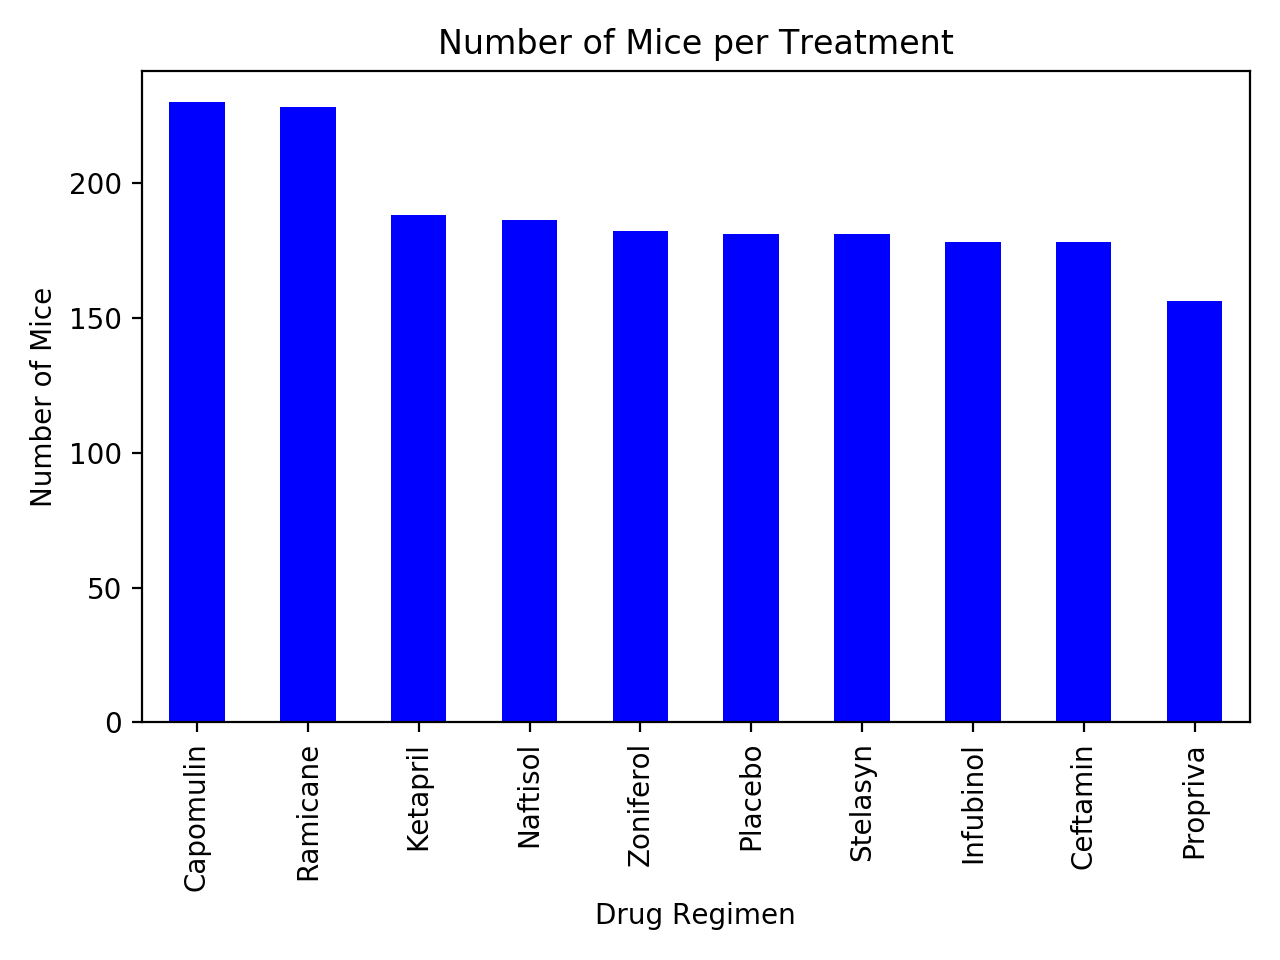

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas
plt.figure(1)
plot_pandas= mice_and_drugs.plot(kind="bar", color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


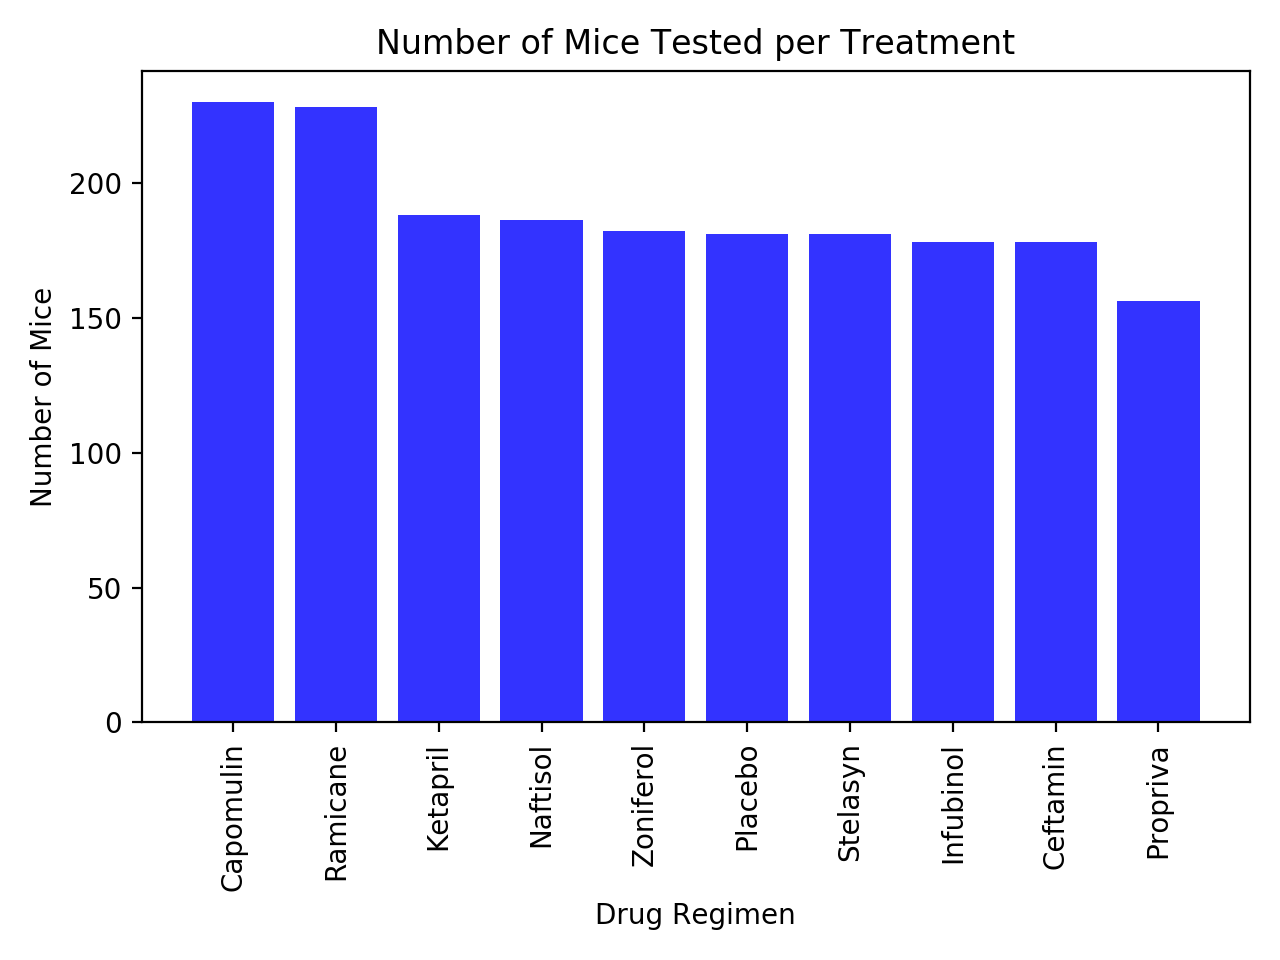

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
y_axis= mice_and_drugs
x_axis= mice_and_drugs.index.values
plt.figure(2)
plt.bar(x_axis, y_axis, color="b", alpha=0.8, align="center")
plt.show()
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.tight_layout()

In [13]:
group_gender = clean_df.groupby(["Mouse ID","Sex"])
group_gender
gender_df = pd.DataFrame(group_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


<IPython.core.display.Javascript object>


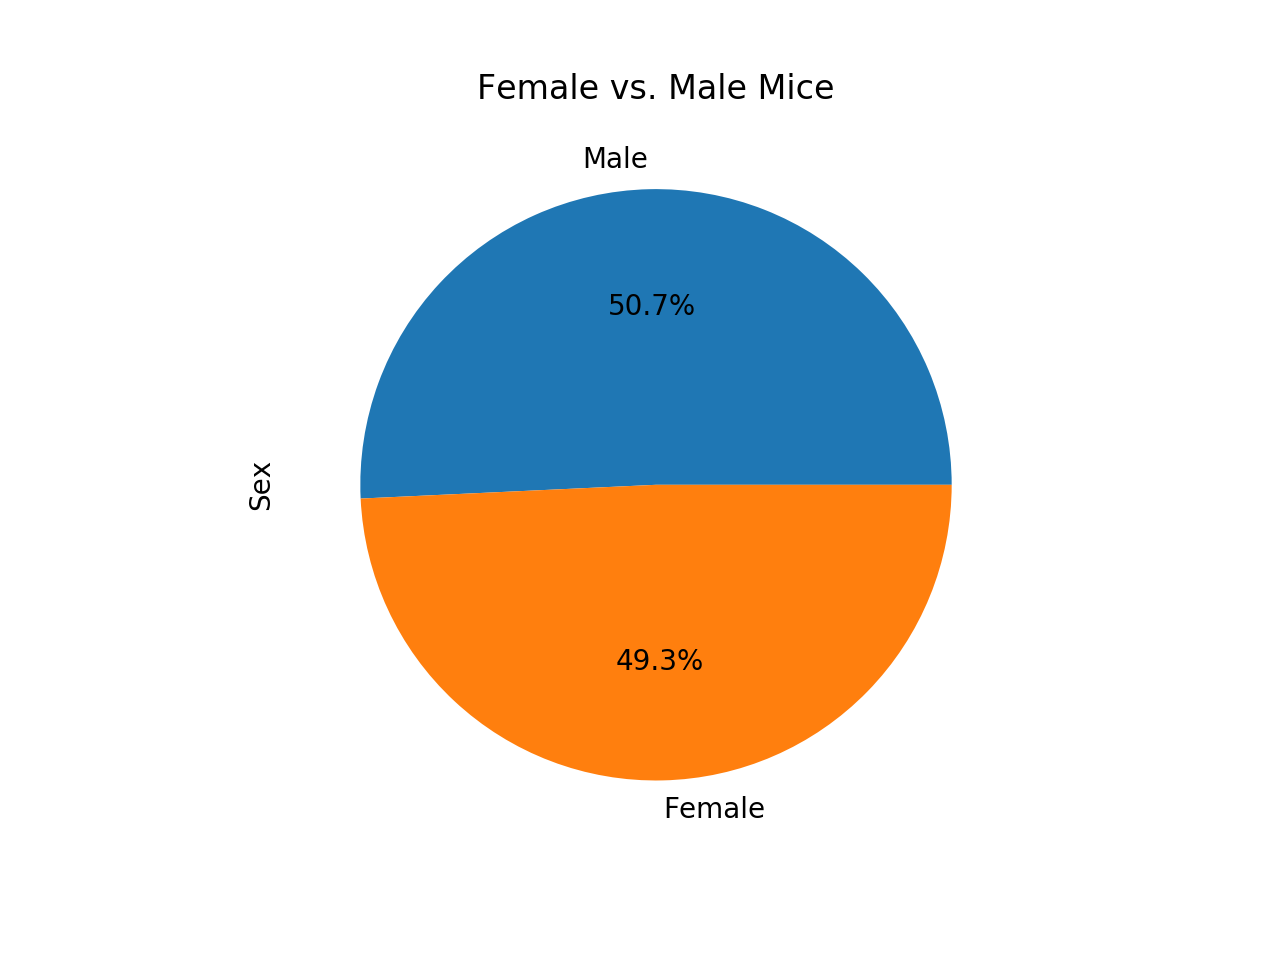

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.figure(3)
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


<IPython.core.display.Javascript object>


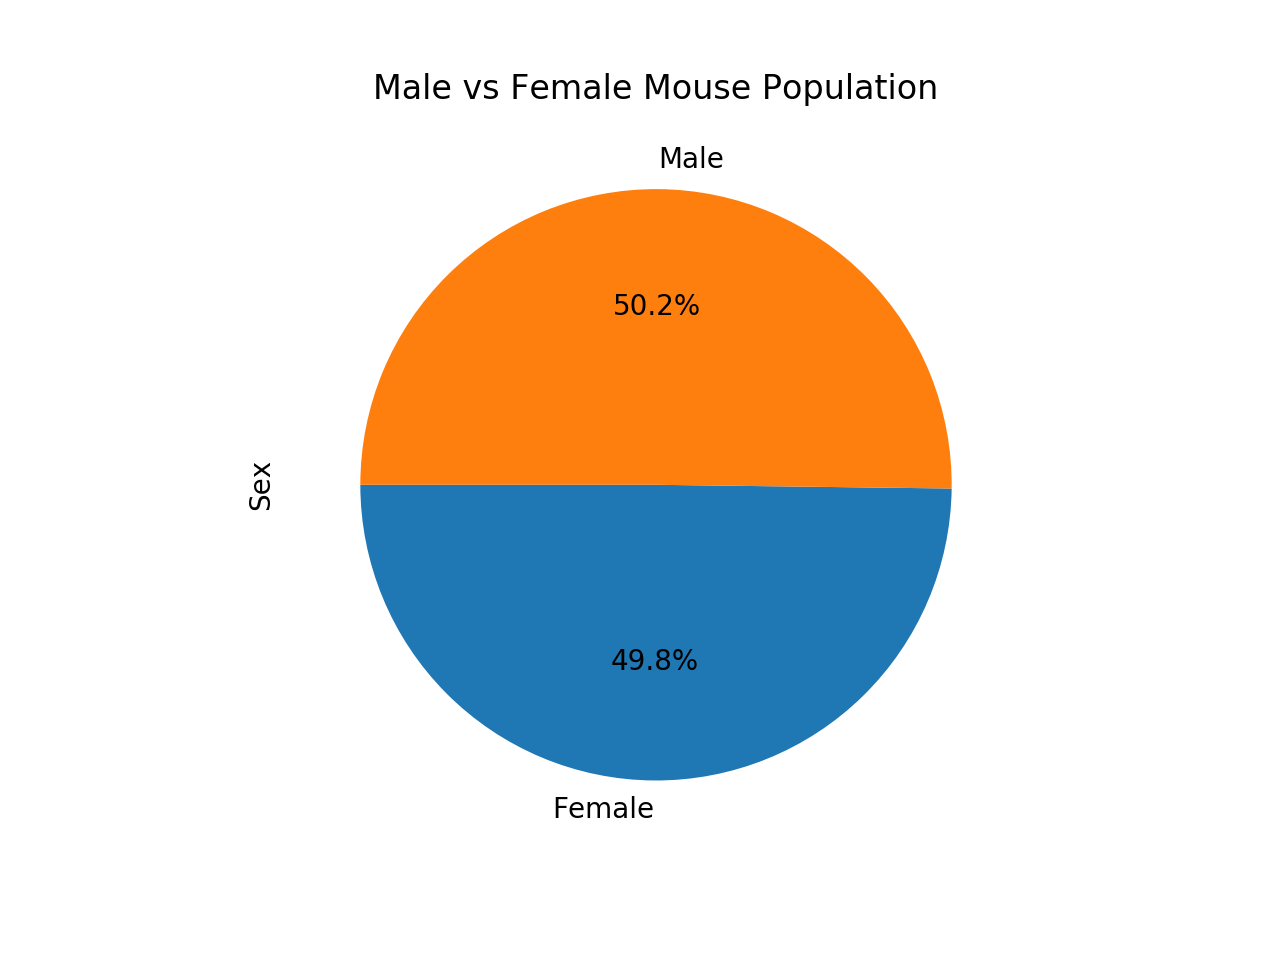

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_mice= clean_df["Sex"].value_counts()
female_mice
plt.figure(4)
labels=["Female", "Male"]
sizes= [124, 125]
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df= clean_df.loc[clean_df["Drug Regimen"]== "Capomulin", :]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"]== "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"]== "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"]== "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last= capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_last_df= pd.DataFrame(capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_merge= pd.merge(capomulin_last_df, clean_df, on= ("Mouse ID", "Timepoint"), how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [17]:
# Start by getting the last (greatest) timepoint for each mouse
ramicane_last= ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_last_df= pd.DataFrame(ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge= pd.merge(ramicane_last_df, clean_df, on= ("Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
infubinol_last= infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_last_df= pd.DataFrame(infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
infubinol_merge= pd.merge(infubinol_last_df, clean_df, on= ("Mouse ID", "Timepoint"), how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
ceftamin_last= ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last_df= pd.DataFrame(ceftamin_last)
ceftamin_last_df.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ceftamin_merge= pd.merge(ceftamin_last_df, clean_df, on= ("Mouse ID", "Timepoint"), how="left")

ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [20]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments= mouse_data_complete[mouse_data_complete["Drug Regimen"].isin(drugs)]
treatments.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

last_timepoint= treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint= last_timepoint.stack(level=0).unstack(level=0)
    
# Create empty list to fill with tumor vol data (for plotting)
empty_tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment= 0
for drug in drugs:
    quartiles= last_timepoint[drug].quantile([.25, .5, .75]).round(2)
    lowerq= quartiles[.25].round(2)
    upperq= quartiles[.75].round(2)
    iqr= round(upperq-lowerq, 2)
    lower_bound= round(lowerq - (1.5*iqr),2)
    upper_bound= round(upperq + (1.5*iqr),2)
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

<IPython.core.display.Javascript object>


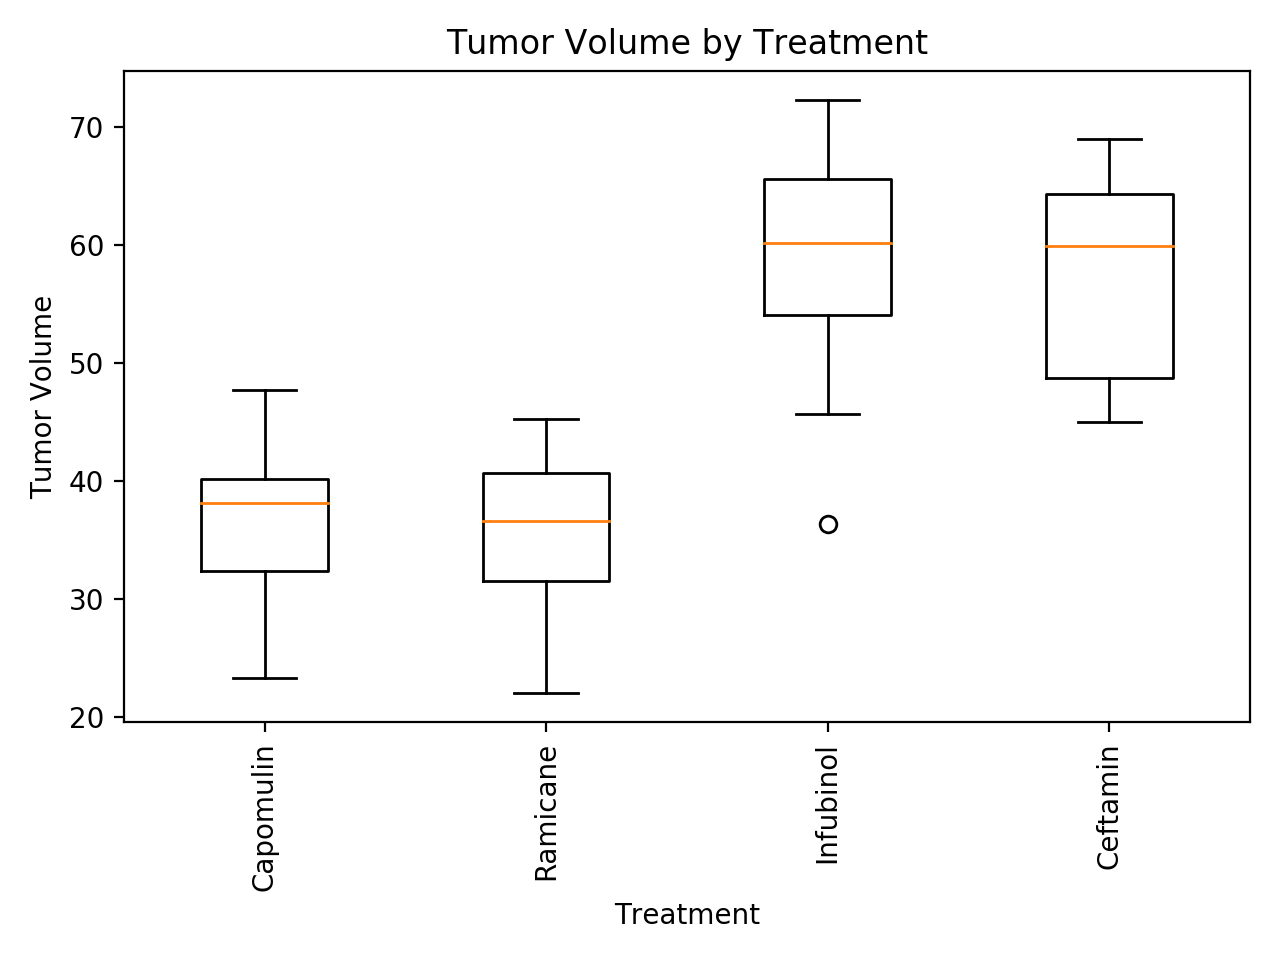

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
empty_tumor=[]
for drug in drugs:
    empty_tumor.append(list(last_timepoint[drug].dropna()))
    
plt.figure(8)
plt.boxplot(empty_tumor)
plt.title("Tumor Volume by Treatment")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume")
plt.xticks([1,2,3,4], drugs, rotation= 90)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


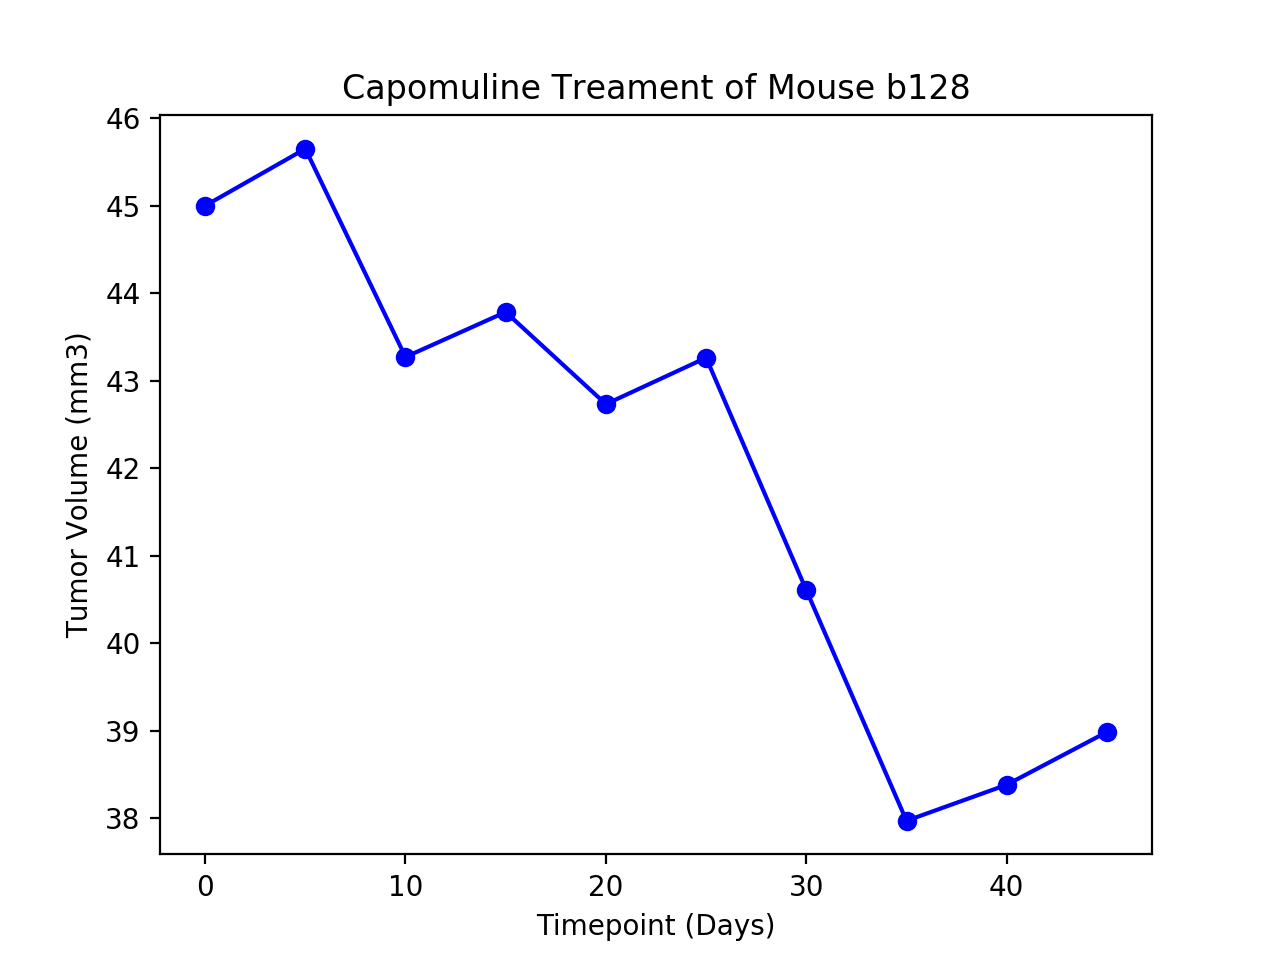

Text(0, 0.5, 'Tumor Volume (mm3)')

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line= capomulin_df.loc[capomulin_df["Mouse ID"]== "b128", :]
capomulin_line.head()
x= capomulin_line["Timepoint"]
y= capomulin_line["Tumor Volume (mm3)"]

fig, ax= plt.subplots()
plt.plot(x, y, marker= "o", color= "b")
plt.title("Capomuline Treament of Mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


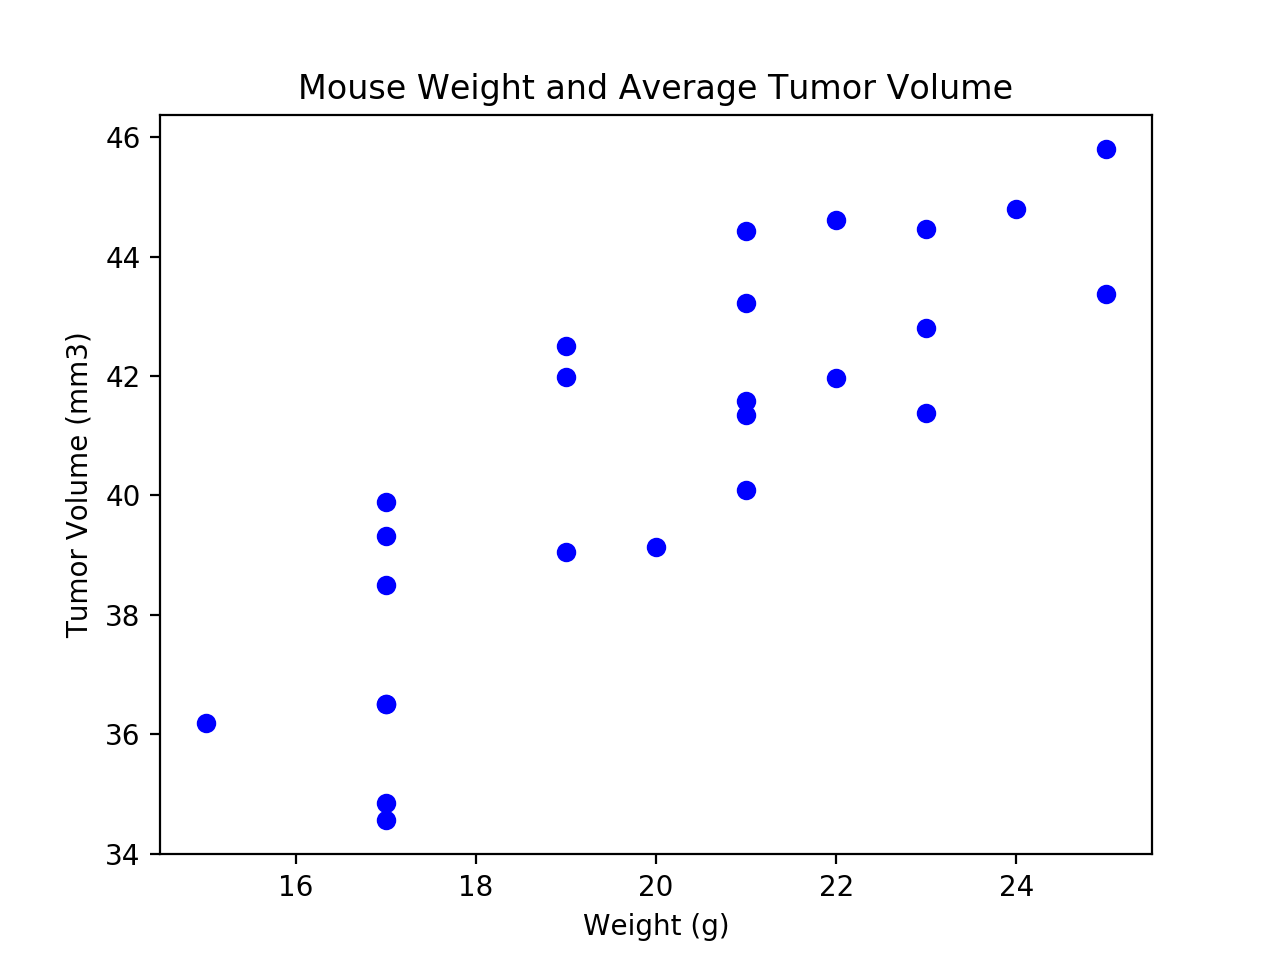

Text(0, 0.5, 'Tumor Volume (mm3)')

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure(6)
avg_tumor_vol= capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"], color="b")
plt.title("Mouse Weight and Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation= st.pearsonr(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor size is {round(correlation [0], 2)}")


The correlation between mouse weight and average tumor size is 0.84


<IPython.core.display.Javascript object>


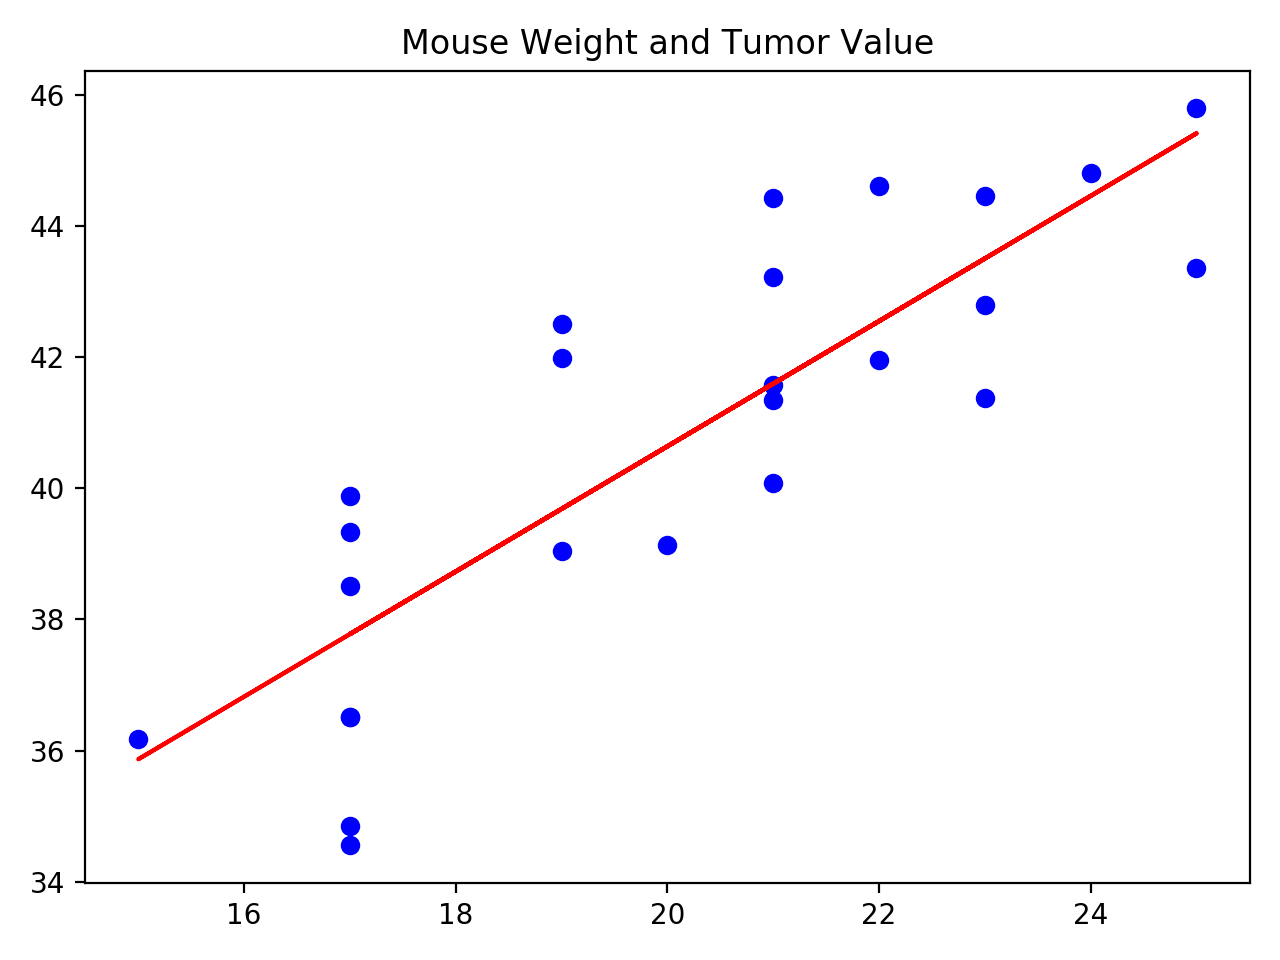

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
regress_values= avg_tumor_vol["Weight (g)"] * slope + intercept
plt.figure(7)
plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_tumor_vol["Weight (g)"], regress_values, color='red')
plt.title("Mouse Weight and Tumor Value")
plt.xlabel=("Weight (g)")
plt.ylabel = ("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()